# Dados, bancos de dados e APIs

Vimos como podemos obter nossos dados a partir de arquivos de texto e planilhas, mas a maior parte dos dados existentes está armazenada em bancos de dados. Esses dados são obtidos através de uma conexão com o banco de dados e a realização de consultas ou queries. Existem linguagens específicas para realizar essas consultas, como SQL, a Structured Query Language, que lida com bancos de dados relacionais.

## Acessando bancos de dados pelo Python com ORMs

Vamos ver como podemos fazer essas consultas utilizando ORM, ou Object Relational Mappers, bibliotecas que permitem a realização dessas consultas através de funções Python.

## Obtendo dados da internet através de APIs

Outra forma de obter dados dos bancos de dados é através de APIs, Application Programming Interfaces, que são vias de acesso a dados através da internet. A maior parte dessas APIs é acessada através de simples pedidos (requests) e respostas (responses).

### Pandas Data Reader

Essa é uma biblioteca interessante que nos dá acesso a uma API chamada Yahoo Finance. Essa API é capaz de obter valores sobre ações de empresas de capital aberto, ou seja, empresas cujas ações estão no mercado público de ações. 

Para obter a informação, precisamos utilizar seu símbolo no mercado, que podemos obter através desse link da NASDAQ: https://api.nasdaq.com/api/screener/stocks?tableonly=true&limit=25&offset=0&download=true

Para obter os dados, vamos utilizar a biblioteca pandas_datareader, por onde acessaremos a API.

In [33]:
import pandas_datareader.data as web
import pandas as pd
import datetime   # Vamos utilizar para lidar com datas
import numpy as np # Vamos utilizar para representar vetores
import matplotlib.pyplot as plt # Essa é uma biblioteca de visualização
from sklearn.linear_model import LinearRegression # Vamos utilizar para fazer regressões lineares

In [9]:
nomes = web.get_nasdaq_symbols()
nomes

,Nasdaq Traded,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
Symbol,,,,,,,,,,,
A,True,"Agilent Technologies, Inc. Common Stock",N,,False,100.0,False,NaN,A,A,False
AA,True,Alcoa Corporation Common Stock,N,,False,100.0,False,NaN,AA,AA,False
AAA,True,Listed Funds Trust AAF First Priority CLO Bond...,P,,True,100.0,False,NaN,AAA,AAA,False
AAAU,True,Goldman Sachs Physical Gold ETF Shares,Z,,True,100.0,False,NaN,AAAU,AAAU,False
AAC,True,Ares Acquisition Corporation Class A Ordinary ...,N,,False,100.0,False,NaN,AAC,AAC,False
...,...,...,...,...,...,...,...,...,...,...,...
ZXZZT,True,NASDAQ TEST STOCK,Q,G,False,100.0,True,N,NaN,ZXZZT,False
ZY,True,Zymergen Inc. - Common Stock,Q,Q,False,100.0,False,N,NaN,ZY,False
ZYME,True,Zymeworks Inc. Common Shares,N,,False,100.0,False,NaN,ZYME,ZYME,False


In [10]:
empresas = pd.read_csv('symbols.csv')
empresas

,Nome,Ticker,Exchange,Industria
0,AMBEV S.A,ABEV,NYSE,Beverages
1,Azul,AZUL,NYSE,Travel & Leisure
2,Banco Bradesco,BBD,NYSE,Banks
3,Banco Bradesco - Com,BBDO,NYSE,Banks
4,Banco Santander Brasil,BSBR,NYSE,Banks
5,BrasilAgro,LND,NYSE,Real Estate Inv&Serv
6,Braskem,BAK,NYSE,Chemicals
7,BRF S.A.,BRFS,NYSE,Food Producers
8,Centrais Eletricas Brasileiras - Com,EBR,NYSE,Electricity
9,Companhia Brasileira de Distribuica,CBD,NYSE,Food &Drug Retailers


In [11]:
def obter_stock(empresa,start,end):
    df = web.DataReader(empresa, 'yahoo', start, end)
    return df['Adj Close']

In [15]:
start = datetime.datetime(2020, 9, 7)
end = datetime.datetime(2022, 9, 8)
empresa = 'ABEV'
dados = pd.DataFrame()
dados[empresa] = pd.DataFrame(obter_stock(empresa,start,end))

In [16]:
dados.index[0]

Timestamp('2020-09-08 00:00:00')

In [17]:
# Salvando em arquivos
# Excel
dados.to_excel(f'{empresa}.xlsx')
# CSV
dados.to_csv(f'{empresa}.csv')
# JSON
dados.to_json(f'{empresa}.json')


<AxesSubplot:xlabel='Date'>

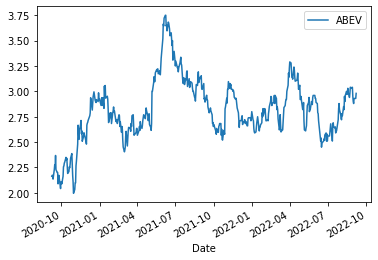

In [18]:
# Visualização
## Séries históricas
dados.plot()

,ABEV,AZUL
ABEV,1.000000,0.460076
AZUL,0.460076,1.000000


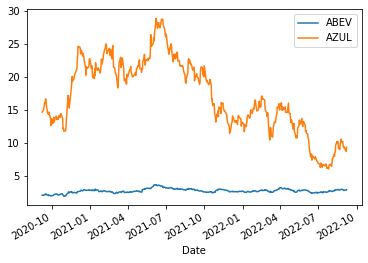

In [19]:
## Correlação
#dados
empresa = 'AZUL'
dados[empresa] = pd.DataFrame(obter_stock(empresa,start,end))
dados.plot()
dados.corr()

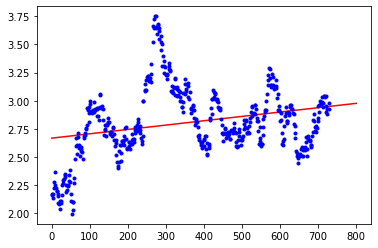

In [51]:
# Como podemos prever um próximo resultado?
X = np.array((dados.index -  dados.index[0]).days
).reshape(-1,1)
y = np.array(dados['ABEV']).reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

X_new = np.array([[0],[800]])
y_predict = lin_reg.predict(X_new)
plt.plot(X_new, y_predict, "r-")
plt.plot(X, dados['ABEV'], "b.")

In [55]:
dados['dias desde'] = np.array((dados.index -  dados.index[0]).days
).reshape(-1,1)
dados.corr()

,ABEV,AZUL,dias desde
ABEV,1.000000,0.460076,0.263679
AZUL,0.460076,1.000000,-0.632554
dias desde,0.263679,-0.632554,1.000000


In [59]:
# Encontre duas empresas com correlação absoluta maior que 0.5
dados = pd.DataFrame()
for empresa in empresas['Ticker']:
    try:
        dados[empresa] = pd.DataFrame(obter_stock(empresa,start,end))
    except:
        print(f'erro empresa {empresa}')
        pass
dados.corr()

,ABEV,AZUL,BBD,BSBR,LND,BAK,BRFS,EBR,CBD,CIG,...,GGB,GET,ITUB,NTCO,PBR,SBS,SUZ,VIV,UGP,VALE
ABEV,1.000000,0.460076,0.664750,0.794408,0.536471,0.582766,0.516247,0.591059,-0.217531,0.572783,...,0.659073,0.023716,0.712056,0.198705,0.279369,0.051662,0.390184,0.306021,0.186293,0.747960
AZUL,0.460076,1.000000,0.803208,0.676276,-0.152758,0.064002,0.863016,-0.173743,0.492136,-0.064329,...,0.025023,-0.241960,0.049747,0.877400,-0.586735,-0.314183,0.568823,-0.418667,0.737225,0.407556
BBD,0.664750,0.803208,1.000000,0.895532,0.173259,0.086753,0.648121,0.148357,0.370186,0.276953,...,0.317593,-0.009214,0.510879,0.610334,-0.169770,0.085336,0.622188,-0.011849,0.737865,0.614026
BSBR,0.794408,0.676276,0.895532,1.000000,0.432240,0.301765,0.539928,0.374248,0.144484,0.519935,...,0.505373,0.161961,0.703198,0.439066,0.043611,0.147372,0.560383,0.209018,0.487981,0.728545
LND,0.536471,-0.152758,0.173259,0.432240,1.000000,0.603002,-0.185128,0.642528,-0.484374,0.834556,...,0.822679,0.079149,0.795429,-0.421121,0.698750,0.494489,0.172204,0.819245,-0.263203,0.648708
BAK,0.582766,0.064002,0.086753,0.301765,0.603002,1.000000,0.270613,0.466741,-0.705947,0.466422,...,0.756664,-0.363710,0.438546,-0.168886,0.351166,-0.224925,0.246556,0.373057,-0.432716,0.691386
BRFS,0.516247,0.863016,0.648121,0.539928,-0.185128,0.270613,1.000000,-0.074683,0.217465,-0.078179,...,0.051094,-0.150896,0.024888,0.769340,-0.498645,-0.479559,0.385230,-0.436812,0.481486,0.368822
EBR,0.591059,-0.173743,0.148357,0.374248,0.642528,0.466741,-0.074683,1.000000,-0.496709,0.522087,...,0.626434,0.552443,0.716634,-0.293262,0.701627,0.467395,-0.056668,0.530103,-0.188675,0.502834
CBD,-0.217531,0.492136,0.370186,0.144484,-0.484374,-0.705947,0.217465,-0.496709,1.000000,-0.330553,...,-0.565915,0.019258,-0.284186,0.631060,-0.581207,0.054972,0.105599,-0.440134,0.772610,-0.298320
CIG,0.572783,-0.064329,0.276953,0.519935,0.834556,0.466422,-0.078179,0.522087,-0.330553,1.000000,...,0.676080,0.019679,0.829120,-0.365914,0.677902,0.490631,0.201894,0.784144,-0.140027,0.526466


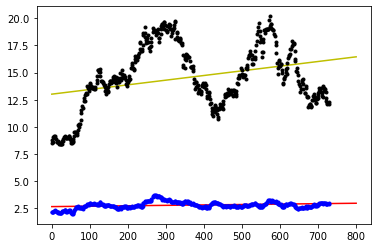

In [60]:
# Vamos obter as regressões para duas empresas com correlação maior que 0.5
# Como podemos prever um próximo resultado?
X = np.array((dados.index -  dados.index[0]).days
).reshape(-1,1)
y = np.array(dados['ABEV']).reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

X_new = np.array([[0],[800]])
y_predict = lin_reg.predict(X_new)
plt.plot(X_new, y_predict, "r-")
plt.plot(X, dados['ABEV'], "b.")

y = np.array(dados['VALE']).reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

X_new = np.array([[0],[800]])
y_predict = lin_reg.predict(X_new)
plt.plot(X_new, y_predict, "y-")
plt.plot(X, dados['VALE'], "k.")

Text(0, 0.5, 'ABEV')

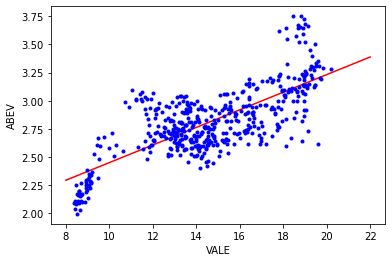

In [70]:
# Vamos obter as regressões para duas empresas com correlação maior que 0.5
# Como podemos prever um próximo resultado?
X = np.array(dados['VALE']).reshape(-1, 1)
y = np.array(dados['ABEV']).reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

X_new = np.array([[8],[22]])
y_predict = lin_reg.predict(X_new)
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.xlabel('VALE')
plt.ylabel('ABEV')


In [73]:
cor = dados.corr()
cor[cor > 0.9]

,ABEV,AZUL,BBD,BSBR,LND,BAK,BRFS,EBR,CBD,CIG,...,GGB,GET,ITUB,NTCO,PBR,SBS,SUZ,VIV,UGP,VALE
ABEV,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZUL,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BBD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BSBR,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LND,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAK,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BRFS,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EBR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CIG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'ELP')

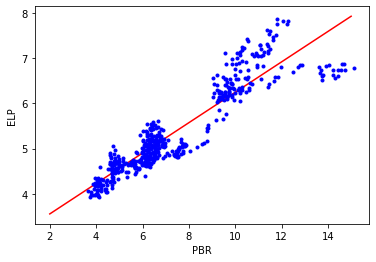

In [76]:
# Vamos obter as regressões para duas empresas com correlação maior que 0.5
# Como podemos prever um próximo resultado?
X = np.array(dados['PBR']).reshape(-1, 1)
y = np.array(dados['ELP']).reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

X_new = np.array([[2],[15]])
y_predict = lin_reg.predict(X_new)
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.xlabel('PBR')
plt.ylabel('ELP')